# Travel Triangle site web scriping and Data Analysis


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel(r"C:\Users\lenovo slim 3\OneDrive\Desktop\python\EDA\travel_trinagle\travel_triangle.xlsx")

In [3]:
df.head()

,Package Name,No.OF_Days,Actual_price,Package_Price,City,Discount_amt,Rate,Served_By_site,Other_City
0,Honeymoon Tour Packages,5 Days & 4 Nights,9142,7999,Goa,1143,4.1,24281,Goa (5D)
1,Honeymoon Package,5 Days & 4 Nights,18811,15599,Port,3212,NaN,6033,Port Blair (3D)Havelock (2D)
2,Romantic Package,3 Days & 2 Nights,12000,10500,Mussoorie,1500,4.6,5258,Mussoorie (3D)
3,Coorg Package,3 Days & 2 Nights,15934,14500,Coorg,1434,4.1,6433,Coorg (3D)
4,Andaman Sightseeing Tour Package,5 Days & 4 Nights,36484,33200,Port,3284,NaN,6033,Port Blair (4D)Havelock (1D)


## Feature Engineering

In [4]:
## split no. of days 
df[['Days', 'Nights']] = df['No.OF_Days'].str.extract(r'(\d+)\s+Days.*?(\d+)\s+Nights')

# Convert the 'Days' and 'Nights' columns to integers
df['Days'] = df['Days'].astype(int)
df['Nights'] = df['Nights'].astype(int)

In [5]:
df.drop(columns=['No.OF_Days'], inplace=True)

In [6]:
df.head()

,Package Name,Actual_price,Package_Price,City,Discount_amt,Rate,Served_By_site,Other_City,Days,Nights
0,Honeymoon Tour Packages,9142,7999,Goa,1143,4.1,24281,Goa (5D),5,4
1,Honeymoon Package,18811,15599,Port,3212,NaN,6033,Port Blair (3D)Havelock (2D),5,4
2,Romantic Package,12000,10500,Mussoorie,1500,4.6,5258,Mussoorie (3D),3,2
3,Coorg Package,15934,14500,Coorg,1434,4.1,6433,Coorg (3D),3,2
4,Andaman Sightseeing Tour Package,36484,33200,Port,3284,NaN,6033,Port Blair (4D)Havelock (1D),5,4


In [7]:
df['Discount_Percentage'] = ((df["Discount_amt"] / df["Actual_price"]) * 100).round(1)

In [8]:
df.drop(columns=['Discount_amt'], inplace=True)

In [9]:
df.head()

,Package Name,Actual_price,Package_Price,City,Rate,Served_By_site,Other_City,Days,Nights,Discount_Percentage
0,Honeymoon Tour Packages,9142,7999,Goa,4.1,24281,Goa (5D),5,4,12.5
1,Honeymoon Package,18811,15599,Port,NaN,6033,Port Blair (3D)Havelock (2D),5,4,17.1
2,Romantic Package,12000,10500,Mussoorie,4.6,5258,Mussoorie (3D),3,2,12.5
3,Coorg Package,15934,14500,Coorg,4.1,6433,Coorg (3D),3,2,9.0
4,Andaman Sightseeing Tour Package,36484,33200,Port,NaN,6033,Port Blair (4D)Havelock (1D),5,4,9.0


In [10]:
df.to_excel("travel_colum_changed.xlsx", index=False)

In [11]:
def categorize_package(name):
    if 'Honeymoon'in name:
        return 'Honeymoon Package'
    elif 'Family' in name:
        return 'Family Package'
    else:
        return 'Tour Package'

In [12]:
df['Category'] = df['Package Name'].apply(categorize_package)


In [13]:
df

,Package Name,Actual_price,Package_Price,City,Rate,Served_By_site,Other_City,Days,Nights,Discount_Percentage,Category
0,Honeymoon Tour Packages,9142,7999,Goa,4.1,24281,Goa (5D),5,4,12.5,Honeymoon Package
1,Honeymoon Package,18811,15599,Port,NaN,6033,Port Blair (3D)Havelock (2D),5,4,17.1,Honeymoon Package
2,Romantic Package,12000,10500,Mussoorie,4.6,5258,Mussoorie (3D),3,2,12.5,Tour Package
3,Coorg Package,15934,14500,Coorg,4.1,6433,Coorg (3D),3,2,9.0,Tour Package
4,Andaman Sightseeing Tour Package,36484,33200,Port,NaN,6033,Port Blair (4D)Havelock (1D),5,4,9.0,Tour Package
...,...,...,...,...,...,...,...,...,...,...,...
962,Best Selling Varanasi Package,16129,15000,Varanasi,4.1,13417,Varanasi (3D),3,2,7.0,Tour Package
963,Lonavala Mahabaleshwar Tour Package,19780,18000,Mahabaleshwar,4.1,6033,Mahabaleshwar (2D)Lonavala (2D),4,3,9.0,Tour Package
964,Pleasurable Kasauli Sightseeing Tour Package,26901,24480,Kasauli,4.2,25920,Kasauli (3D),3,2,9.0,Tour Package
965,Mesmeric Mount Abu Honeymoon Package,7692,7000,Mount,NaN,13417,Mount Abu (2D),2,1,9.0,Honeymoon Package


In [14]:
df.to_excel("travel_colum_changed.xlsx", index=False)

## Data Desciption

In [15]:
df.shape

(967, 11)

In [16]:
df.columns

Index(['Package Name', 'Actual_price', 'Package_Price', 'City', 'Rate',
       'Served_By_site', 'Other_City', 'Days', 'Nights', 'Discount_Percentage',
       'Category'],
      dtype='object')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 967 entries, 0 to 966
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Package Name         967 non-null    object 
 1   Actual_price         967 non-null    int64  
 2   Package_Price        967 non-null    int64  
 3   City                 967 non-null    object 
 4   Rate                 862 non-null    float64
 5   Served_By_site       967 non-null    int64  
 6   Other_City           967 non-null    object 
 7   Days                 967 non-null    int64  
 8   Nights               967 non-null    int64  
 9   Discount_Percentage  967 non-null    float64
 10  Category             967 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.2+ KB


In [18]:
df.describe()

,Actual_price,Package_Price,Rate,Served_By_site,Days,Nights,Discount_Percentage
count,967.000000,967.000000,862.000000,967.000000,967.000000,967.000000,967.000000
mean,22531.156153,20431.159255,4.167633,11363.692865,4.710445,3.710445,9.375595
std,16934.978660,15445.063201,0.143164,8754.754913,2.118372,2.118372,3.057182
min,2365.000000,2199.000000,3.400000,3000.000000,2.000000,1.000000,1.000000
25%,12637.000000,11500.000000,4.100000,5258.000000,3.000000,2.000000,8.000000
50%,17553.000000,15750.000000,4.200000,6433.000000,4.000000,3.000000,9.000000
75%,27445.000000,24999.000000,4.200000,24281.000000,6.000000,5.000000,9.000000
max,184615.000000,168000.000000,4.600000,25920.000000,18.000000,17.000000,38.700000


## Data Cleaning

In [19]:
df.isna().sum()

Package Name             0
Actual_price             0
Package_Price            0
City                     0
Rate                   105
Served_By_site           0
Other_City               0
Days                     0
Nights                   0
Discount_Percentage      0
Category                 0
dtype: int64

In [20]:
df[df['Rate'].isna()]['City'].unique()

array(['Port', 'Goa', 'Manali', 'Rishikesh', 'Munnar', 'Kasol',
       'Srinagar', 'Coorg', 'Shillong', 'Leh', 'Haridwar', 'Dalhousie',
       'Tirupati', 'Calicut', 'Pelling', 'Darjeeling', 'Mumbai', 'New',
       'Mount', 'Auli', 'Mussoorie', 'Dharamshala', 'Guwahati',
       'Mahabaleshwar', 'Madurai', 'Nainital', 'Agra', 'Chikmagalur',
       'Jaisalmer', 'Ahmedabad', 'Katra', 'Kaziranga', 'Kovalam',
       'Lansdowne', 'Dehradun', 'POKHARA', 'Gangtok', 'Chopta', 'Shimla',
       'Kochi', 'Kasauli', 'Ooty', 'Kalimpong', 'Pondicherry', 'Indore',
       'Bhubaneshwar', 'Chandigarh', 'Delhi', 'Kutch', 'Kodaikanal'],
      dtype=object)

In [21]:
df['Rate'].fillna(df['Rate'].mean().round(1),inplace=True)

C:\Users\lenovo slim 3\AppData\Local\Temp\ipykernel_8300\3967688359.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Rate'].fillna(df['Rate'].mean().round(1),inplace=True)


In [22]:
df.isna().sum()

Package Name           0
Actual_price           0
Package_Price          0
City                   0
Rate                   0
Served_By_site         0
Other_City             0
Days                   0
Nights                 0
Discount_Percentage    0
Category               0
dtype: int64

In [23]:
df.to_excel("travel_colum_changed.xlsx", index=False)

In [24]:
df.duplicated().sum()

np.int64(0)

## Outlier analysis

<Axes: >

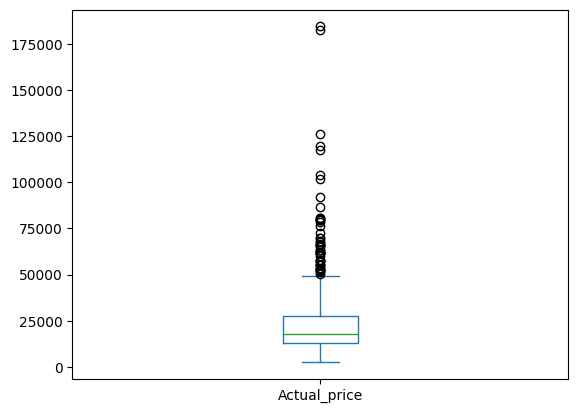

In [25]:
df['Actual_price'].plot(kind='box')

<Axes: >

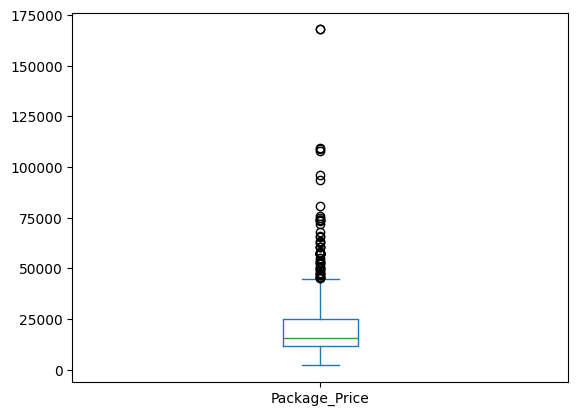

In [26]:
df['Package_Price'].plot(kind='box')

#### Not removing the outliers since each package is different ranges of price

## Problem Statement
1) India tour packages by different guides analysis on different tourist spots 
2) Torist guide analysis on different guides 

## UniVaiate analysis

In [27]:
df.head()

,Package Name,Actual_price,Package_Price,City,Rate,Served_By_site,Other_City,Days,Nights,Discount_Percentage,Category
0,Honeymoon Tour Packages,9142,7999,Goa,4.1,24281,Goa (5D),5,4,12.5,Honeymoon Package
1,Honeymoon Package,18811,15599,Port,4.2,6033,Port Blair (3D)Havelock (2D),5,4,17.1,Honeymoon Package
2,Romantic Package,12000,10500,Mussoorie,4.6,5258,Mussoorie (3D),3,2,12.5,Tour Package
3,Coorg Package,15934,14500,Coorg,4.1,6433,Coorg (3D),3,2,9.0,Tour Package
4,Andaman Sightseeing Tour Package,36484,33200,Port,4.2,6033,Port Blair (4D)Havelock (1D),5,4,9.0,Tour Package


Text(0.5, 1.0, 'Actual_price Distribution')

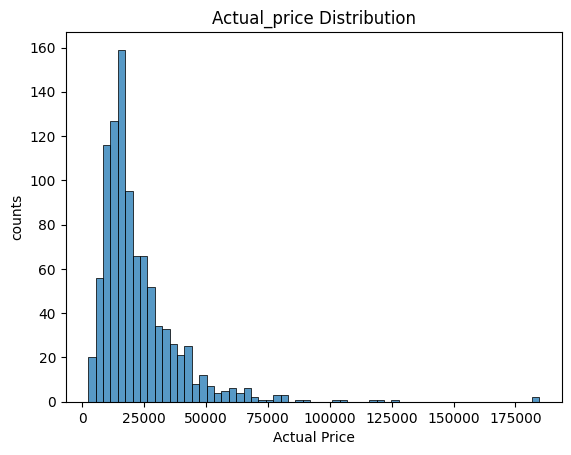

In [28]:
sns.histplot(data=df,x='Actual_price')
plt.xlabel('Actual Price')
plt.ylabel('counts')
plt.title ("Actual_price Distribution")

<Axes: ylabel='Density'>

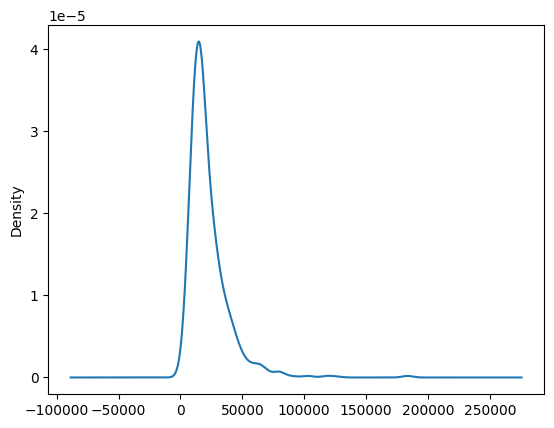

In [29]:
df['Actual_price'].plot(kind='kde')

Text(0.5, 1.0, 'Package Price Distribution')

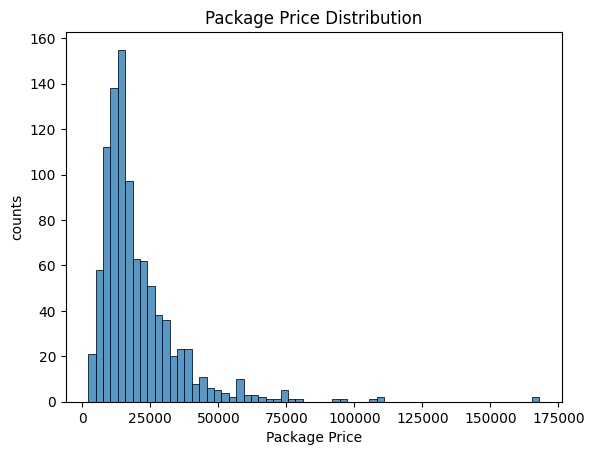

In [30]:
sns.histplot(data=df,x='Package_Price')
plt.xlabel('Package Price')
plt.ylabel('counts')
plt.title ("Package Price Distribution")

<Axes: ylabel='Density'>

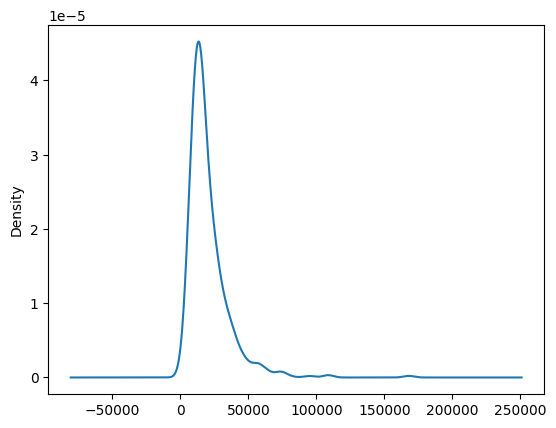

In [31]:
df['Package_Price'].plot(kind='kde')

Text(0.5, 1.0, 'Served By site Distribution')

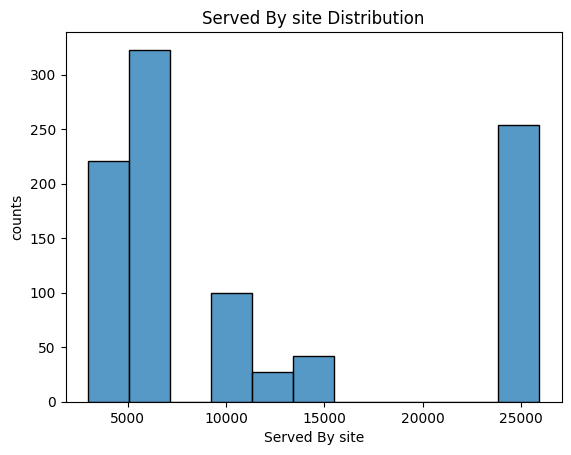

In [32]:
sns.histplot(data=df,x='Served_By_site')
plt.xlabel('Served By site')
plt.ylabel('counts')
plt.title ("Served By site Distribution")

Text(0.5, 1.0, 'Rating Distribution')

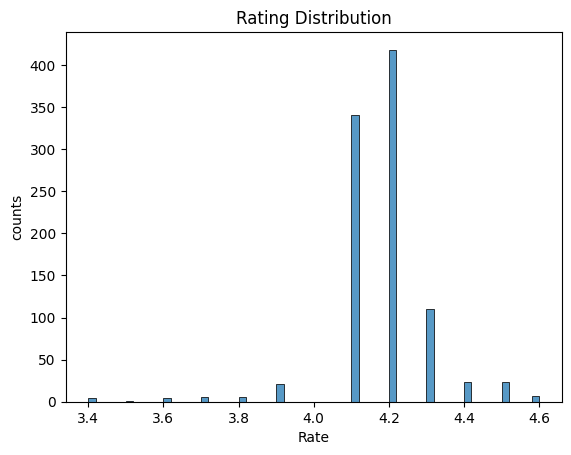

In [33]:
sns.histplot(data=df,x='Rate')
plt.xlabel('Rate')
plt.ylabel('counts')
plt.title ("Rating Distribution")

Text(0.5, 1.0, 'Days Distribution')

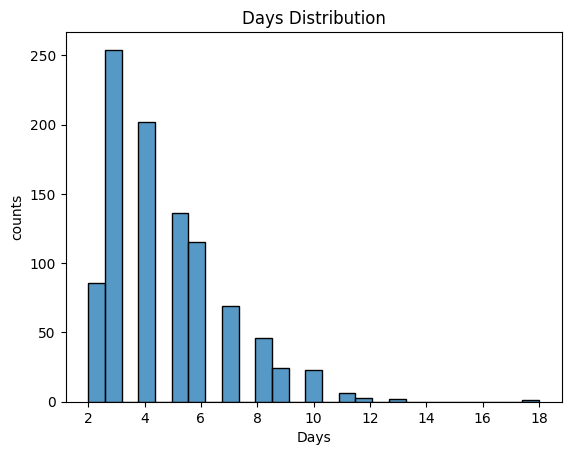

In [34]:
sns.histplot(data=df,x='Days')
plt.xlabel('Days')
plt.ylabel('counts')
plt.title ("Days Distribution")

Text(0.5, 1.0, 'Nights Distribution')

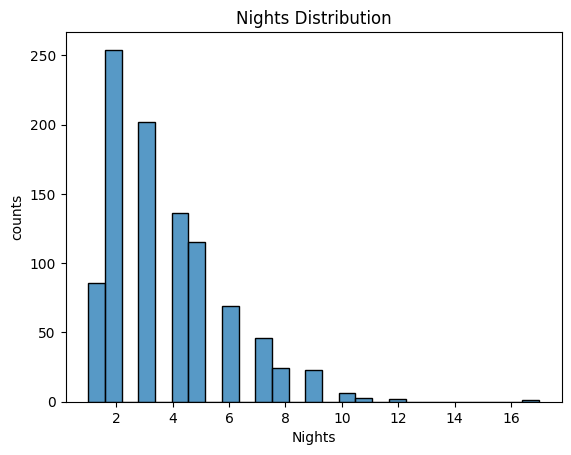

In [35]:
sns.histplot(data=df,x='Nights')
plt.xlabel('Nights')
plt.ylabel('counts')
plt.title ("Nights Distribution")

Text(0.5, 1.0, 'Package Category Distribution')

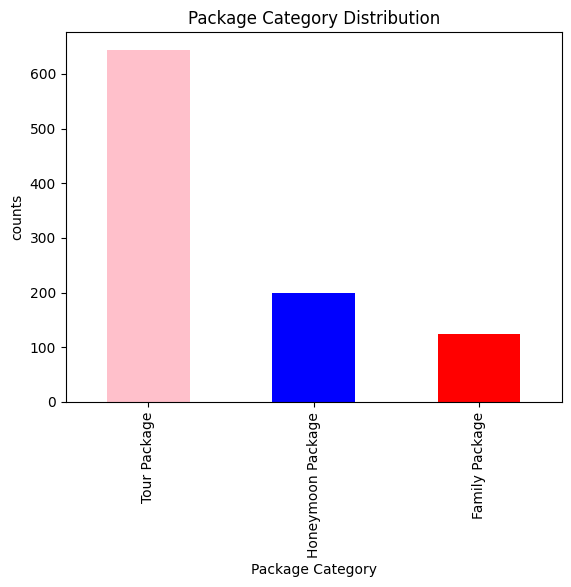

In [36]:
df['Category'].value_counts().plot(kind='bar',color=['pink', 'blue','red'])
plt.xlabel('Package Category')
plt.ylabel('counts')
plt.title ("Package Category Distribution")

<Axes: xlabel='City'>

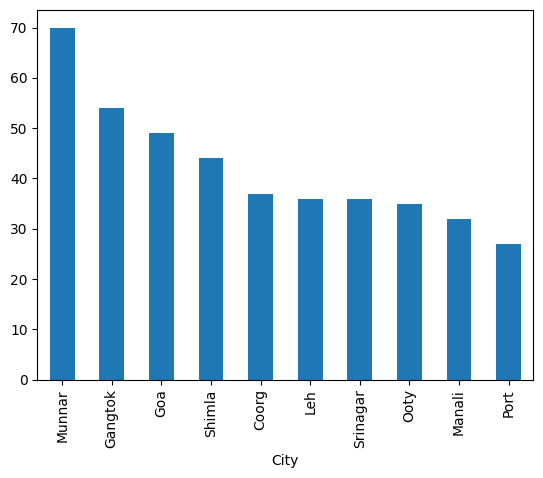

In [37]:
df['City'].value_counts().head(10).plot(kind='bar')  

**Univerate Analysis**

1. Actual Price and Package Price are right-skewed, with most packages priced below ₹30,000. There are a few high-priced packages that are outliers.
2. On average, the Actual Price is ₹22,531, and the discounted Package Price is ₹20,431, showing a general markdown.
3. Ratings are clustered around 4.1 to 4.2, with a mean rating of 4.17. This indicates overall positive reviews for the packages
4. The number of tourists served per package varies widely, with peaks around 5,000 and 24,000.
5. Most packages have durations of 2 to 6 days (mean: 4.7 days) and corresponding nights between 2 and 5 nights (mean: 3.7 nights)
6. Tour Package is the most frequent category (644 occurrences), followed by Honeymoon Package.


In [38]:
top_rated = df.sort_values(by='Rate', ascending=False).head(5)
top_rated

,Package Name,Actual_price,Package_Price,City,Rate,Served_By_site,Other_City,Days,Nights,Discount_Percentage,Category
554,Best Selling Nainital Holidays,12365,11499,Jim,4.6,10111,Jim Corbett (1D)Nainital (3D),4,3,7.0,Tour Package
2,Romantic Package,12000,10500,Mussoorie,4.6,5258,Mussoorie (3D),3,2,12.5,Tour Package
369,Captivating Delhi Tour Package,8791,8000,Agra,4.6,6433,Agra (1D)New Delhi (3D),4,3,9.0,Tour Package
89,Best Selling Ooty Mysore Tour Packages for a R...,16541,14556,Ooty,4.6,5258,Ooty (4D),4,3,12.0,Tour Package
737,Chopta Camping Tour Package,5645,5250,Chopta,4.6,6433,Chopta (2D),2,1,7.0,Tour Package


## Bivariate Analysis

Text(0, 0.5, 'Package Price')

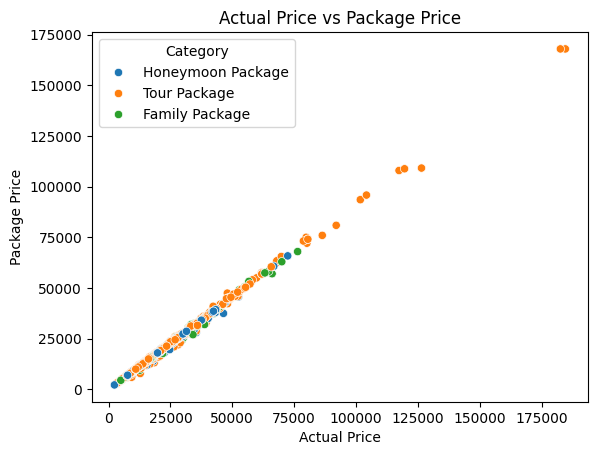

In [39]:
sns.scatterplot(data=df, x="Actual_price", y="Package_Price", hue="Category" )
plt.title("Actual Price vs Package Price")
plt.xlabel("Actual Price")
plt.ylabel("Package Price")

1.A strong linear correlation is observed between the Actual Price and Package Price.

Text(0, 0.5, 'Tourists Served')

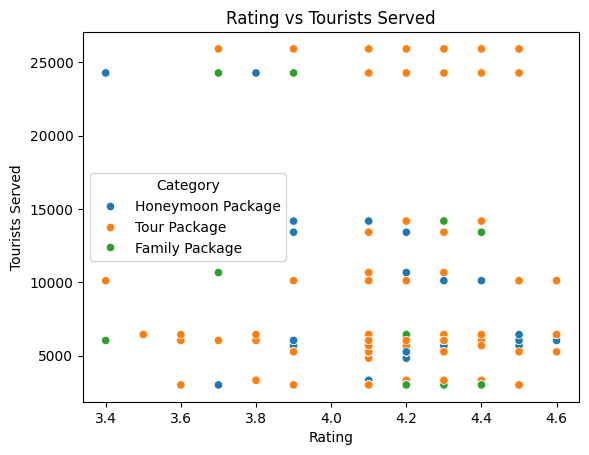

In [40]:
sns.scatterplot(data=df, x="Rate", y="Served_By_site", hue="Category")
plt.title("Rating vs Tourists Served")
plt.xlabel("Rating")
plt.ylabel("Tourists Served")

Higher ratings are not necessarily linked to higher tourists served, suggesting that other factors (like price, location) might influence demand.
Honeymoon Packages tend to serve more tourists at moderate ratings (around 4.2).

C:\Users\lenovo slim 3\AppData\Local\Temp\ipykernel_8300\3229251098.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Category", y="Package_Price", palette="Set2")


Text(0, 0.5, 'Package Price')

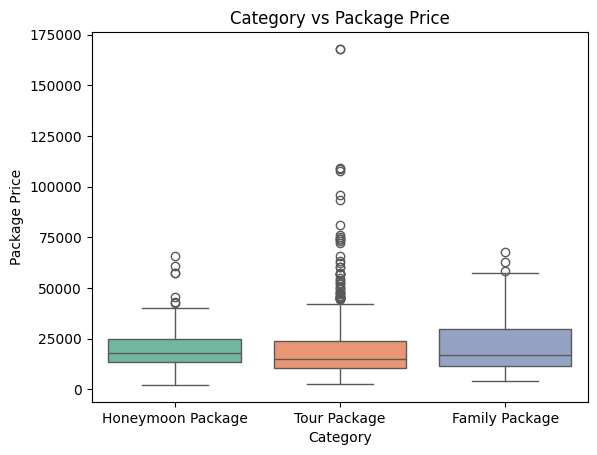

In [41]:
sns.boxplot(data=df, x="Category", y="Package_Price", palette="Set2")
plt.title("Category vs Package Price")
plt.xlabel("Category")
plt.ylabel("Package Price")

Honeymoon Packages generally have a slightly higher median price compared to Tour Packages.
Tour Packages show more price variability, with a few outliers in high price ranges.

C:\Users\lenovo slim 3\AppData\Local\Temp\ipykernel_8300\752376298.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_data, x="City", y="Served_By_site", palette="Set3")


Text(0, 0.5, 'Tourists Served')

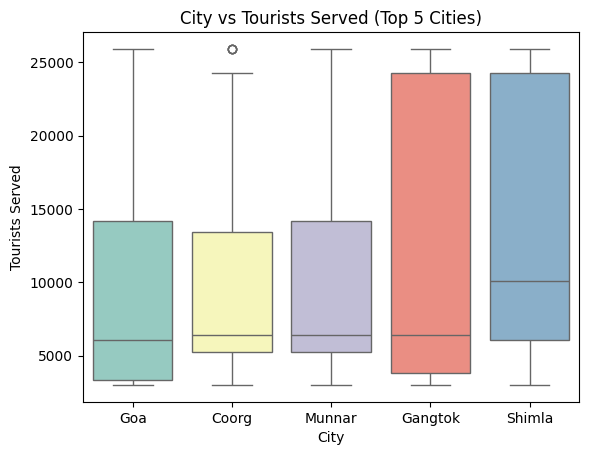

In [42]:
top_cities = df["City"].value_counts().head(5).index
filtered_data = df[df["City"].isin(top_cities)]

sns.boxplot(data=filtered_data, x="City", y="Served_By_site", palette="Set3")
plt.title("City vs Tourists Served (Top 5 Cities)")
plt.xlabel("City")
plt.ylabel("Tourists Served")

Goa and Gangtok have a broader range of tourists served.
Shimla consistently serves a higher number of tourists, indicating its popularity or guide availability.

In [43]:
category_summary = df.groupby('Category').agg({'Served_By_site': 'sum', 'Package_Price': 'mean'})
category_summary


,Served_By_site,Package_Price
Category,,
Family Package,1427173,21221.620968
Honeymoon Package,2185745,20054.773869
Tour Package,7375773,20395.263975


In [44]:
city_summary = df.groupby('City').agg({'Package_Price': 'mean', 'Rate': 'mean'})
city_summary1 = city_summary.sort_values(by='Package_Price', ascending=False)
city_summary1.head(10)

,Package_Price,Rate
City,,
Dehradun,76212.333333,4.200000
Indore,50000.000000,4.200000
Gangtok,44303.351852,4.151852
Dimapur,42500.000000,4.100000
Darjeeling,35288.928571,4.185714
Chandigarh,34312.500000,4.200000
Bhalukpong,33433.166667,4.183333
Jaipur,29584.450000,4.135000
Katra,29056.125000,4.075000


## Mulitivariate analysis


Text(0.5, 1.02, 'Pairwise Relationships of Key Variables')

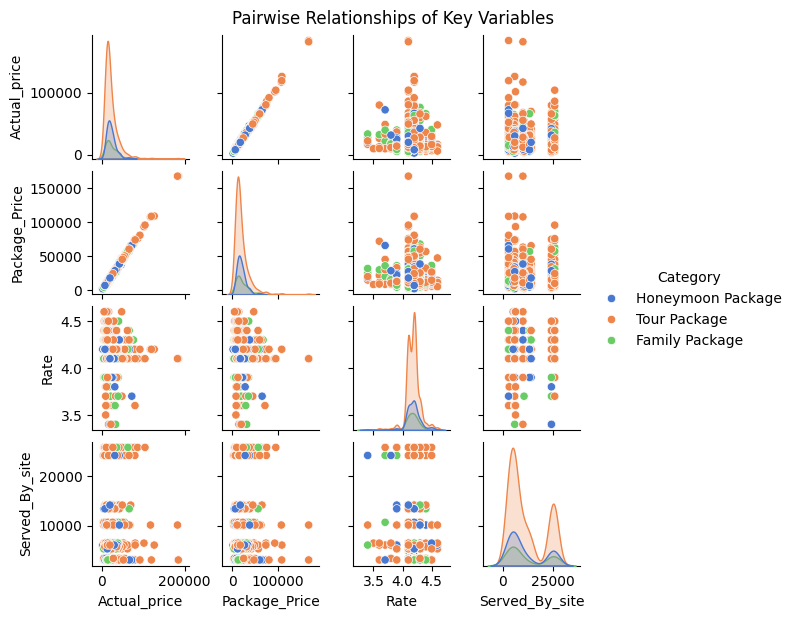

In [55]:
sns.pairplot(df, vars=["Actual_price", "Package_Price", "Rate", "Served_By_site"], hue="Category", palette="muted", diag_kind="kde", height=1.5)
plt.suptitle("Pairwise Relationships of Key Variables", y=1.02)

**Pairwise Relationships**<br>
**Actual Price vs. Package Price:**<br>
Both show a strong positive correlation, indicating consistent discounting practices across categories. Honeymoon Packages often have slightly higher prices.
**Rating vs. Served_By_site:**<br>
While ratings (4.1–4.2) are generally consistent across packages, the number of tourists served varies, suggesting external factors like popularity of the city or duration matter more.

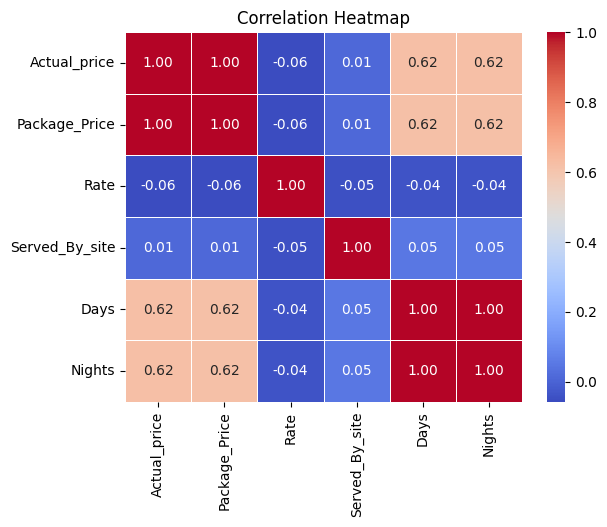

In [46]:

correlation_matrix = df[["Actual_price", "Package_Price", "Rate", "Served_By_site", "Days", "Nights"]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

1.Days and Nights are perfectly correlated (1.0), as expected.<br>
2.A strong correlation between Package Price and Actual Price (~0.98).<br>
3.Served_By_site has a weak positive correlation with Rate and Days, meaning longer, highly-rated packages slightly attract more tourists.

## Problem Statement

In [47]:
# 1. India Tour Packages Analysis
spot_analysis = df.groupby("City").agg(
    Total_Packages=("Package Name", "count"),
    Avg_Rating=("Rate", "mean"),
    Total_Revenue=("Actual_price", "sum"),
).reset_index()

# 2. Tourist Guide Analysis
guide_analysis = df.groupby("City").agg(
    Total_Packages=("Package Name", "count"),
    Total_Package_served=("Served_By_site", "sum"),
    Avg_Rating=("Rate", "mean"),
).reset_index()
# 3.Category Analysis
category_analysis = df.groupby("Category").agg(
    Total_Packages=("Package Name", "count"),
    Total_price=("Package_Price", "sum"),
    ).reset_index()


In [56]:
spot_analysis1 = spot_analysis.sort_values(by="Total_Revenue", ascending=False).reset_index(drop=True)
spot_analysis2=spot_analysis1.head(5)
spot_analysis3=spot_analysis1.head(10)
spot_analysis3

,City,Total_Packages,Avg_Rating,Total_Revenue
0,Gangtok,54,4.151852,2617923
1,Shimla,44,4.159091,1386229
2,Munnar,70,4.160000,1173402
3,Leh,36,4.155556,1148439
4,Srinagar,36,4.166667,1032798
5,Goa,49,4.175510,918726
6,New,26,4.153846,791610
7,Coorg,37,4.154054,711280
8,Ooty,35,4.182857,687939
9,Manali,32,4.162500,668754


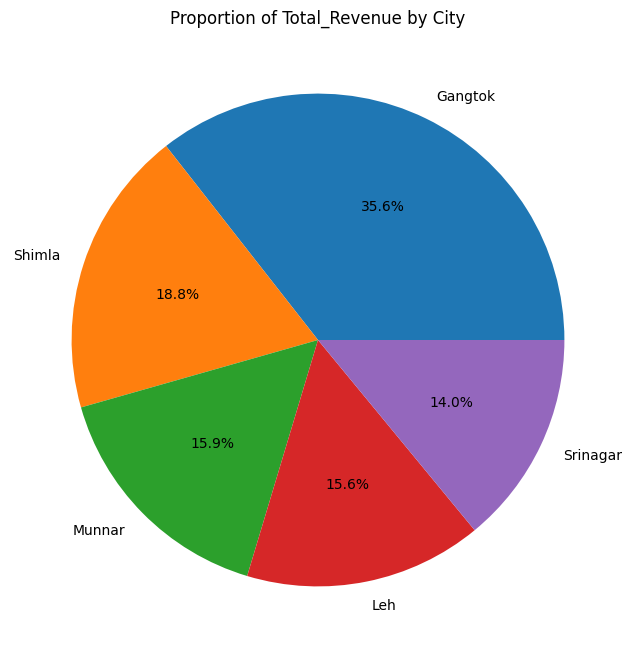

In [49]:
spot_analysis2.set_index("City")["Total_Revenue"].plot(kind="pie", autopct='%1.1f%%', figsize=(8, 8))
plt.title("Proportion of Total_Revenue by City")
plt.ylabel("")
plt.show()

**Top 5 Packages based on the City with respective total revenue:**<br>
Gangtok served by 35.6% of revenue,followed by Shimla by 18.8%, Munnar by 15.9%, and Leh served by 15.5% 

In [50]:

guide_analysis1 = guide_analysis.sort_values(by="Total_Package_served", ascending=False).reset_index(drop=True)
guide_analysis2=guide_analysis1.head(5)
guide_analysis2

,City,Total_Packages,Total_Package_served,Avg_Rating
0,Munnar,70,759088,4.160000
1,Gangtok,54,675318,4.151852
2,Shimla,44,569218,4.159091
3,Goa,49,524356,4.175510
4,Srinagar,36,505617,4.166667


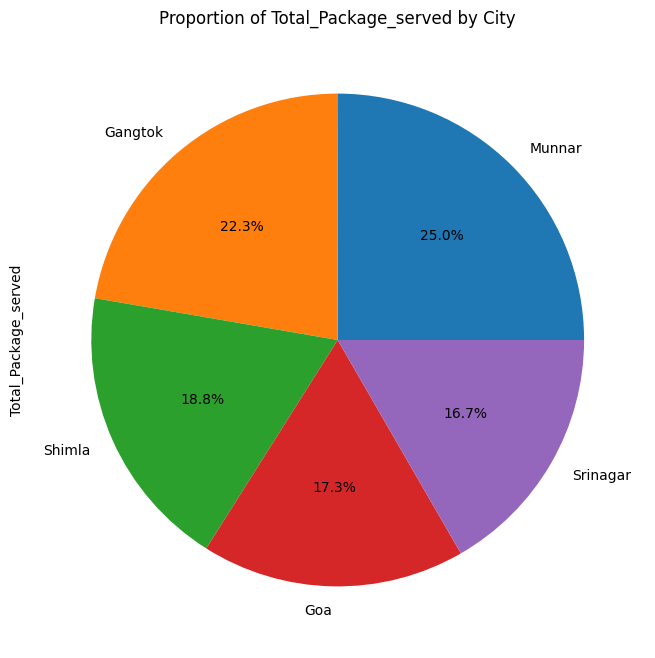

In [51]:
guide_analysis2.set_index("City")["Total_Package_served"].plot(kind="pie", autopct='%1.1f%%', figsize=(8, 8))
plt.title("Proportion of Total_Package_served by City")
plt.show()

**Top 5 city is which has highest number of TravelTriangle has served packages** <br>
Munnuar as served 25%, followed by Gangtok as 22.3%, shimla as serverd 18.8%, Goa served 17.3% and Srinagar served by 16.7%

In [57]:
guide_analysis3=guide_analysis1.head(10)
guide_analysis3

,City,Total_Packages,Total_Package_served,Avg_Rating
0,Munnar,70,759088,4.160000
1,Gangtok,54,675318,4.151852
2,Shimla,44,569218,4.159091
3,Goa,49,524356,4.175510
4,Srinagar,36,505617,4.166667
5,Leh,36,439063,4.155556
6,Ooty,35,413682,4.182857
7,Coorg,37,405928,4.154054
8,Shillong,25,358966,4.140000
9,Manali,32,291798,4.162500


In [52]:
category_analysis

,Category,Total_Packages,Total_price
0,Family Package,124,2631481
1,Honeymoon Package,199,3990900
2,Tour Package,644,13134550


In [53]:
Gangtok= df[df['City'] == 'Gangtok']

In [54]:
##Gangtok

## Summary
**Package Duration:**

Packages with 4–6 days perform better in terms of tourists served. Extending durations in popular locations could increase demand.

**Tourists Served by Cities:**

Cities like Goa and Shimla consistently serve a higher number of tourists, indicating their strong draw. Marketing efforts should focus on these cities.

**Category-Specific Preferences:**

Honeymoon Packages tend to have higher prices but serve more tourists, implying couples' preference for premium services.
Tour Packages have greater variability in prices, with some high-priced options not performing as well.

**Ratings and Popularity:**

High ratings (above 4.2) correlate weakly with tourists served, suggesting practical factors like price and destination matter more than customer reviews alone.<br>

**Problem Statement** <br>
**1. India tour packages by different guides analysis on different tourist spots**<br> 

**Top 5 Packages based on the City with respective total revenue:** Gangtok served by 35.6% of revenue,followed by Shimla by 18.8%, Munnar by 15.9%, and Leh served by 15.5%
**2. Tourist Guide Analysis**<br>

**Top 5 city is which has highest number of TravelTriangle has served packages** <br>
Munnuar as served 25%, followed by Gangtok as 22.3%, shimla as serverd 18.8%, Goa served 17.3% and Srinagar served by 16.7%


**Suggestions**<br>
1.Customers tend to prefer discounted packages, which is evident in the proportionality between Actual Price and Package Price.<br>
2.Higher-priced packages attract fewer customers unless they are in highly demanded destinations.